In [12]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt 

- load audio file with Librosa
- sr is the sample rate 
- the signal will be a numpy array 1d, containing values = sr*T 
- where T is the duration of the audio file so 22050*30 values 
- each containing the amplitude of the waveform 

Text(0.5, 1.0, 'Waveform')

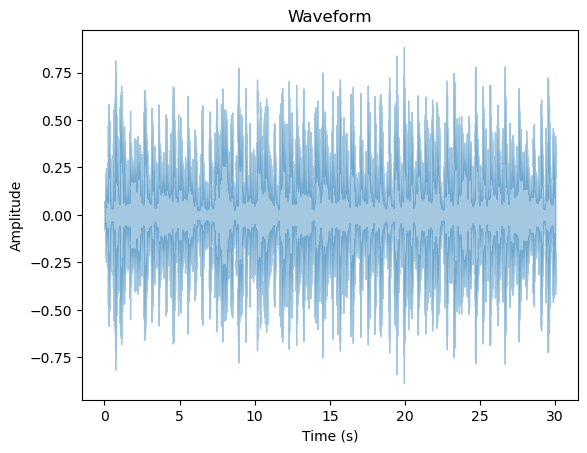

In [13]:
file = "blues.00000.wav"
signal, sample_rate = librosa.load(file, sr=22050)

librosa.display.waveshow(y=signal, sr=sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

- FFT -> power spectrum

Text(0.5, 1.0, 'Power spectrum')

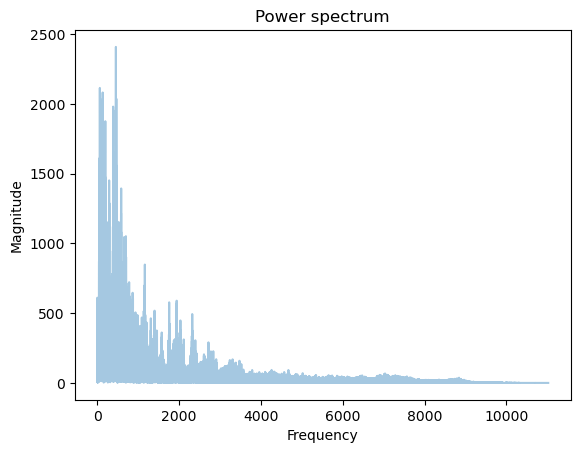

In [14]:
fft = np.fft.fft(signal)
spectrum = np.abs(fft) # calculate abs values on complex numbers to get magnitude
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

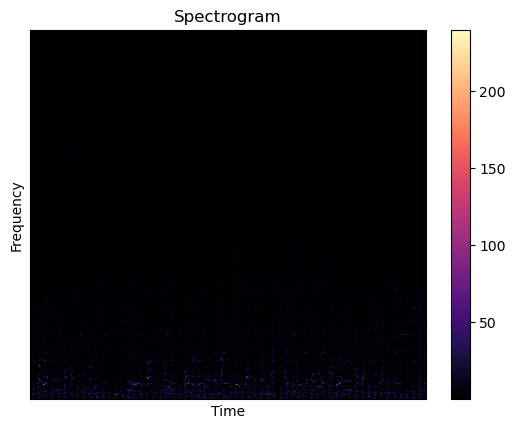

In [15]:
# STFT -> spectrogram
# The advantage here we can see info about amplitudes vs freq and time aswell not static
hop_length = 512 # in num. of samples, amount we are shifting each fourier transform 
# to the right, because we slide each time and calculate the fourier transform
n_fft = 2048 # window in num. of samples, window considered when performing 
# when performing single fast fourier transform

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

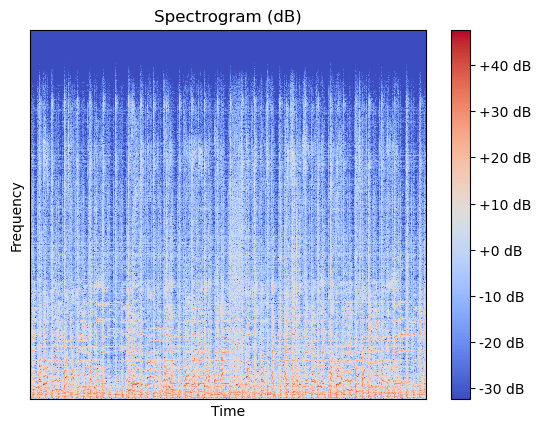

In [17]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

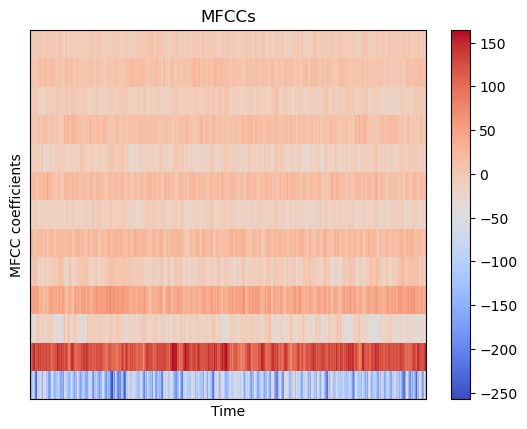

In [18]:
# MFCCs
# extract 13 MFCCs
#MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
